In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
import pandas as pd

In [54]:
ds = xr.tutorial.open_dataset("air_temperature.nc")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [58]:
print(ds.air.attrs)

{'long_name': '4xDaily Air temperature at sigma level 995', 'units': 'degK', 'precision': np.int16(2), 'GRIB_id': np.int16(11), 'GRIB_name': 'TMP', 'var_desc': 'Air temperature', 'dataset': 'NMC Reanalysis', 'level_desc': 'Surface', 'statistic': 'Individual Obs', 'parent_stat': 'Other', 'actual_range': array([185.16, 322.1 ], dtype=float32)}


In [59]:
air_temp = ds["air"]
air_temp

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [60]:
air_temp.dims

('time', 'lat', 'lon')

In [61]:
#  southwestern Kansas, USA, near Garden City, Kansas.
selected_ds = air_temp.sel(time="2013-01-01", lat=37.3, lon=260.0, method="nearest") 
selected_ds

<xarray.DataArray 'air' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    lat      float32 4B 37.5
    lon      float32 4B 260.0
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

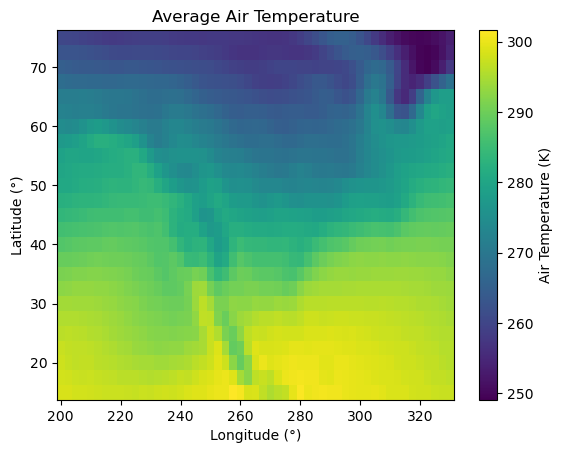

In [62]:
average_temp = air_temp.mean(dim="time")
average_temp.plot(cbar_kwargs={'label': 'Air Temperature (K)'})
plt.title("Average Air Temperature")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.show()

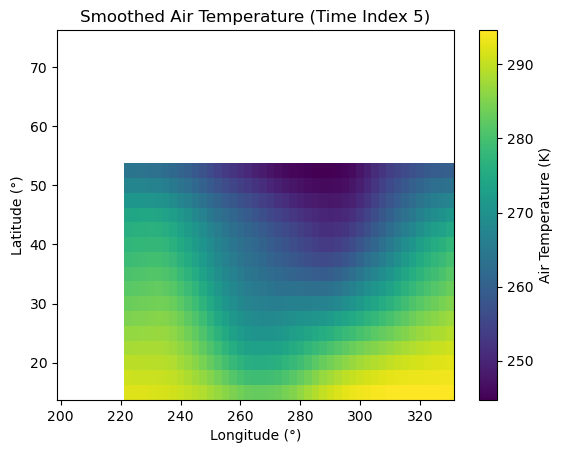

In [ ]:
smoothed_snapshot = ds.air.isel(time=5).rolling(lat=5, lon=5).mean()
smoothed_snapshot.plot(cbar_kwargs={'label': 'Air Temperature (K)'})
plt.title("Smoothed Air Temperature (Time Index 5)")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.show()

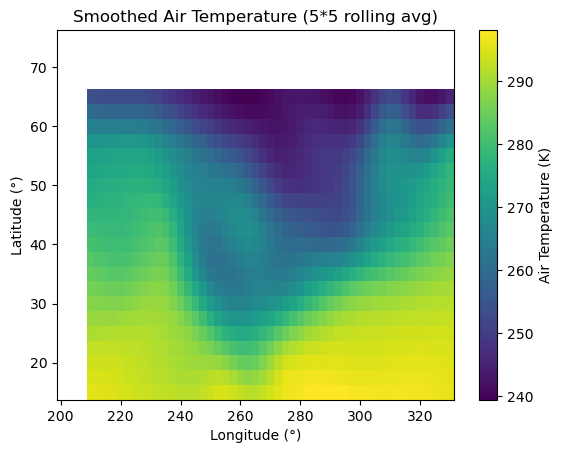

In [100]:
smooth_snap = ds.air.isel(time=5).rolling(lat=5, lon=5).mean()
smooth_snap.plot(cbar_kwargs={'label': 'Air Temperature (K)'})
plt.title("Smoothed Air Temperature (5*5 rolling avg)")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.show()

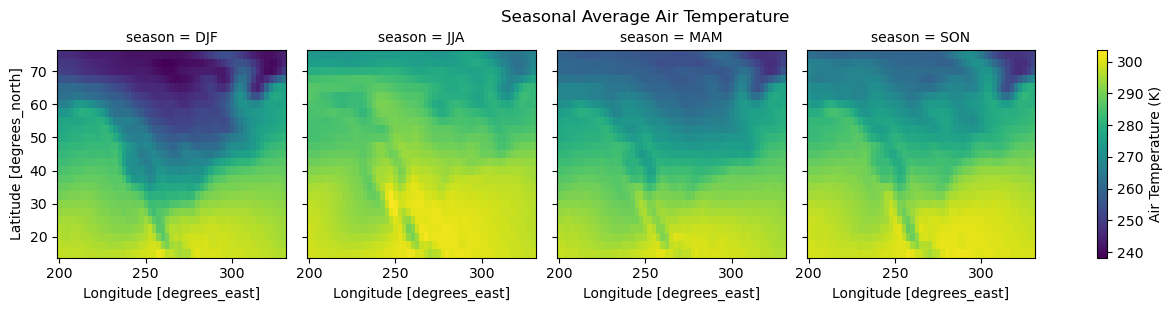

In [57]:
seasonal_avg = air_temp.groupby("time.season").mean(dim="time")
seasonal_avg.plot(col="season", cmap="viridis", cbar_kwargs={'label': 'Air Temperature (K)'})
plt.suptitle("Seasonal Average Air Temperature", y=1.02)
plt.show()

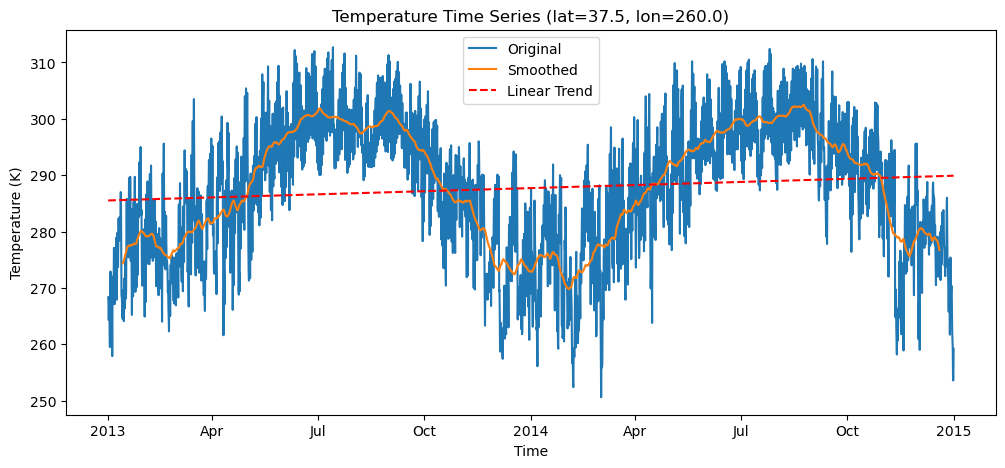

In [104]:
plt.figure(figsize=(12, 5))
air_temp_kansas = ds["air"].sel(lat=37.5, lon=260.0)
air_temp_kansas.plot(label="Original")

smoothed_temp = air_temp_kansas.rolling(time=100, center=True).mean()
smoothed_temp.plot(label="Smoothed")

time_index = np.arange(len(air_temp_kansas.time))
trend = np.poly1d(np.polyfit(time_index, air_temp_kansas.values, 1))
plt.plot(air_temp_kansas.time, trend(time_index), label='Linear Trend', color='red', linestyle='--')

plt.title("Temperature Time Series (lat=37.5, lon=260.0)")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()